![PyData_logo](./static/pydata-logo-madrid-2016.png)

# Remove Before Flight
## Analyzing Flight Safety Data with Python

###### Jesús Martos Carrizo
###### Alejandro Sáez Mollejo

### Introduction

#### Who are these guys? 

* Aerospace Engineers
* Passion for programming
* AeroPython

#### Some figures 

![passengers](./static/passenger.jpg)
###### by Ryan McGuire

####  Objective of this talk

* ¿Explode? pandas capabilities for data analysis
* Give a first approach to aviation safety
     (what is it? actors implied...)
* Show the big figures about accidents in aviation
* Reproduce with the data found some of the most well known results.

##### Disclaimer

* We are not safety experts
* We are not data scientists
* We are pandas experts

well...

**ACTUALLY I DON'T KNOW WHAT I'M DOING HERE.**

#### Flight safety

##### What is it? 

DEFINITION according to ...

##### Actors implied 

EASA, AESA, EUROCONTROL, OACI, IATA, FAA...
Governments

#### Some remarks about

![pandas-logo](./static/pandas_logo.png)

Three main features:
* 
* 
* 

#### Data source

<img src="./static/ntsb.jpg" style="width: 150px;"/>

__National Transportation Safety Board__ is charged with determining the probable cause of transportation accidents and promoting transportation safety, and assisting victims of transportation accidents and their families.


**AND THEY PUBLISH RAW DATA!**: http://www.ntsb.gov/_layouts/ntsb.aviation/index.aspx

### Loading & Cleaning data 

In [141]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [142]:
# Some configuration options:
pd.set_option('max_columns', 70)
pd.set_option('max_rows', 50)

plt.style.use('ggplot')

##### A first glipse of the data: events

[Data base structure](./data/admsrel.pdf)

In [143]:
events = pd.read_csv("./data/events.csv", sep='|', low_memory=False)
events.head()

,ev_id,ntsb_no,ev_type,ev_date,ev_dow,ev_time,ev_tmzn,ev_city,ev_state,ev_country,ev_site_zipcode,ev_year,ev_month,mid_air,on_ground_collision,latitude,longitude,latlong_acq,apt_name,ev_nr_apt_id,ev_nr_apt_loc,apt_dist,apt_dir,apt_elev,wx_brief_comp,wx_src_iic,wx_obs_time,wx_obs_dir,wx_obs_fac_id,wx_obs_elev,wx_obs_dist,wx_obs_tmzn,light_cond,sky_cond_nonceil,sky_nonceil_ht,...,sky_cond_ceil,vis_rvr,vis_rvv,vis_sm,wx_temp,wx_dew_pt,wind_dir_deg,wind_dir_ind,wind_vel_kts,wind_vel_ind,gust_ind,gust_kts,altimeter,wx_dens_alt,wx_int_precip,metar,ev_highest_injury,inj_f_grnd,inj_m_grnd,inj_s_grnd,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,inj_tot_t,invest_agy,ntsb_docket,ntsb_notf_from,ntsb_notf_date,ntsb_notf_tm,fiche_number,lchg_date,lchg_userid,wx_cond_basic,faa_dist_office
0,20001208X07734,LAX97FA143,ACC,04/02/1997 12:00:00 AM,WE,2016.0,MST,GRAND CANYON,AZ,USA,86023,1997.0,4,N,N,,,NaN,,,OFAP,NaN,NaN,NaN,PARP,WFAC,1954.0,180.0,GCN,6606.0,21.0,MST,NDRK,SCAT,3600.0,...,BKN,"0,00000000e+00",0.0,"1,00000000e+01",-2.0,-3.0,0.0,U,0.0,CALM,N,0.0,"2,90000000e+01",NaN,UNK,NaN,FATL,0.0,0.0,0.0,2.0,NaN,NaN,NaN,2.0,N,1890.0,NaN,04/02/1997 12:00:00 AM,1922.0,IMAGE,12/08/2000 12:13:19 PM,dbo,IMC,NaN
1,20021008X05297,CHI02LA299,ACC,09/29/2002 12:00:00 AM,Su,2100.0,CDT,Moorhead,MN,USA,56560,2002.0,9,N,N,465021N,0963947W,NaN,Moorhead Municipal,JKJ,ONAP,NaN,NaN,917.0,UNK,WFAC,2053.0,47.0,FAR,908.0,9.0,BST,NDRK,CLER,NaN,...,OVC,NaN,NaN,"7,00000000e+00",14.0,12.0,160.0,Y,13.0,SPEC,Y,0.0,"2,97099991e+01",NaN,NaN,NaN,SERS,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,N,13246.0,FAA,10/03/2002 12:00:00 AM,945.0,DMS,04/23/2003 12:26:44 PM,NTSB\\MONR,VMC,Minneapolis FSDO
2,20040127X00111,LAX04LA103,ACC,10/12/2003 12:00:00 AM,Su,1640.0,MST,Scottsdale,AZ,USA,85255,2003.0,10,N,N,333722N,1115438W,NaN,Scottsdale,SDL,ONAP,NaN,NaN,1510.0,FULL,WFAC,1653.0,NaN,KSDL,1510.0,NaN,MST,DAYL,CLER,NaN,...,NONE,NaN,NaN,"1,00000000e+01",33.0,12.0,NaN,NaN,NaN,CALM,N,NaN,"2,98899994e+01",NaN,NaN,NaN,NONE,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,N,17586.0,FAA,01/22/2004 12:00:00 AM,1215.0,DMS,04/28/2005 02:59:26 PM,NTSB\\JOHB,VMC,WP-SDL-FSDO
3,20001213X34369,ANC86LA135,ACC,08/23/1986 12:00:00 AM,SA,1100.0,AKD,TALKEETNA,AK,USA,99676,1986.0,8,N,N,,,NaN,,,OFAP,"0,00000000e+00",0.0,0.0,UNK,PILO,0.0,0.0,,0.0,0.0,,DAYL,CLER,0.0,...,NONE,"0,00000000e+00",0.0,"5,00000000e+01",10.0,-18.0,0.0,U,0.0,UNK,U,0.0,NaN,NaN,UNK,NaN,NONE,0.0,0.0,0.0,NaN,NaN,3.0,NaN,NaN,N,891.0,NaN,08/23/1986 12:00:00 AM,1430.0,31238,01/02/2001 09:14:50 AM,dbo,VMC,NaN
4,20001213X35290,ANC87LA019,ACC,12/07/1986 12:00:00 AM,SU,1256.0,AST,SHAGELUK,AK,USA,99665,1986.0,12,N,N,,,NaN,,1,OFAP,"0,00000000e+00",0.0,0.0,UNK,PILO,0.0,0.0,,0.0,0.0,,DAYL,SCAT,1500.0,...,NONE,"0,00000000e+00",0.0,"4,00000000e+01",-1.0,-1.0,0.0,U,0.0,CALM,N,0.0,"2,90000000e+01",NaN,LGT,NaN,NONE,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,N,1400.0,NaN,12/07/1986 12:00:00 AM,1300.0,31791,01/02/2001 09:14:55 AM,dbo,VMC,NaN


In [144]:
events.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76880 entries, 0 to 76879
Data columns (total 71 columns):
ev_id                  76880 non-null object
ntsb_no                76852 non-null object
ev_type                76850 non-null object
ev_date                76849 non-null object
ev_dow                 76846 non-null object
ev_time                76535 non-null float64
ev_tmzn                76315 non-null object
ev_city                76792 non-null object
ev_state               73286 non-null object
ev_country             76356 non-null object
ev_site_zipcode        73857 non-null object
ev_year                76848 non-null float64
ev_month               76848 non-null object
mid_air                76103 non-null object
on_ground_collision    76121 non-null object
latitude               66492 non-null object
longitude              66495 non-null object
latlong_acq            10672 non-null object
apt_name               66518 non-null object
ev_nr_apt_id           66011 non-n

In [145]:
# Parsing dates
date_format = "%m/%d/%Y %I:%M:%S %p"
date = events['ev_date'].dropna()
date = pd.to_datetime(date, format=date_format)
time = events['ev_time'].astype(str).str.split('.').str[0].str.zfill(4)
time = pd.to_datetime(time, format="%H%M", errors='coerce') # for nan values

time.fillna('0000', inplace=True)

str_date = date.dt.date.astype(str)
str_time = time.dt.time.astype(str)
date_time = pd.to_datetime(str_date + ' ' + str_time,
                           format="%Y-%m-%d %H:%M:%S")
events['ev_date'] = date_time

In [146]:
events.info(memory_usage='deep', max_cols=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76880 entries, 0 to 76879
Columns: 71 entries, ev_id to faa_dist_office
dtypes: datetime64[ns](1), float64(27), object(43)
memory usage: 205.7 MB


In [147]:
events.columns

Index(['ev_id', 'ntsb_no', 'ev_type', 'ev_date', 'ev_dow', 'ev_time',
       'ev_tmzn', 'ev_city', 'ev_state', 'ev_country', 'ev_site_zipcode',
       'ev_year', 'ev_month', 'mid_air', 'on_ground_collision', 'latitude',
       'longitude', 'latlong_acq', 'apt_name', 'ev_nr_apt_id', 'ev_nr_apt_loc',
       'apt_dist', 'apt_dir', 'apt_elev', 'wx_brief_comp', 'wx_src_iic',
       'wx_obs_time', 'wx_obs_dir', 'wx_obs_fac_id', 'wx_obs_elev',
       'wx_obs_dist', 'wx_obs_tmzn', 'light_cond', 'sky_cond_nonceil',
       'sky_nonceil_ht', 'sky_ceil_ht', 'sky_cond_ceil', 'vis_rvr', 'vis_rvv',
       'vis_sm', 'wx_temp', 'wx_dew_pt', 'wind_dir_deg', 'wind_dir_ind',
       'wind_vel_kts', 'wind_vel_ind', 'gust_ind', 'gust_kts', 'altimeter',
       'wx_dens_alt', 'wx_int_precip', 'metar', 'ev_highest_injury',
       'inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd', 'inj_tot_f', 'inj_tot_m',
       'inj_tot_n', 'inj_tot_s', 'inj_tot_t', 'invest_agy', 'ntsb_docket',
       'ntsb_notf_from', 'ntsb_notf_date'

What we don't really need...

In [148]:
events.drop(['ev_dow', 'ev_time', 'ev_tmzn', 'ev_year', 'ev_month'], axis=1, inplace=True)

Dropping events previuos to 1982 (They shouldn't be here!)

In [149]:
cond = events['ev_date'].dt.year < 1982
print('Dates before 1982: ',cond.sum())
indx = events[cond].index
events.drop(indx, inplace=True)

Dates before 1982:  6


##### Analysing *accidents*: discarding *incidents* 

In [150]:
gby_ev_type = events.groupby('ev_type')
gby_ev_type.groups.keys()

dict_keys(['ACC', 'INC'])

Definitions according to _______

** ACCIDENT **

** INCIDENT**

In [151]:
events = gby_ev_type.get_group('ACC')

In [152]:
events['ev_id'].count()

73887

##### Focus on commercial flights 

In [153]:
aircraft = pd.read_csv("./data/aircraft.csv",
                                    encoding = "ISO-8859-1",  # export the table again.
                                    sep=';',
                                    low_memory=False)

In [154]:
aircraft.head(2)

,ev_id,Aircraft_Key,regis_no,ntsb_no,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,acft_model,acft_series,acft_serial_no,cert_max_gr_wt,acft_category,acft_reg_cls,homebuilt,fc_seats,cc_seats,pax_seats,total_seats,num_eng,fixed_retractable,type_last_insp,date_last_insp,afm_hrs_last_insp,afm_hrs,elt_install,elt_oper,elt_aided_loc_ev,elt_type,owner_acft,owner_street,...,second_pilot,dprt_pt_same_ev,dprt_apt_id,dprt_city,dprt_state,dprt_country,dprt_time,dprt_timezn,dest_same_local,dest_apt_id,dest_city,dest_state,dest_country,phase_flt_spec,report_to_icao,evacuation,lchg_date,lchg_userid,afm_hrs_since,rwy_num,rwy_len,rwy_width,site_seeing,air_medical,med_type_flight,acft_year,fuel_on_board,commercial_space_flight,unmanned,ifr_equipped_cert,elt_mounted_aircraft,elt_connected_antenna,elt_manufacturer,elt_model,elt_reason_other
0,20001204X00000,1,N6312H,ANC99FA021,N,135,CVFR,NaN,SUBS,NONE,NONE,Cessna,207,207,20700478,3800.0,AIR,USUS,N,NaN,NaN,NaN,2.0,1.0,NaN,100H,16/12/1998,75,10286,Y,Y,U,NaN,"VILLAGE AVIATION, INC.",P.O.BOX 221188,...,N,N,BET,BETHEL,AK,NaN,1245.0,AST,SAME,NaN,NaN,NaN,NaN,560.0,NaN,NaN,02/01/2001,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
1,20001204X00001,1,N481EV,ANC99IA025,N,121,IFR,NaN,MINR,GRD,NONE,Boeing,747-100,747-100,19896,750000.0,AIR,USUS,N,NaN,NaN,NaN,9.0,4.0,RETR,COAW,06/01/1999,113,26359,Y,U,U,NaN,"FIRST SECURITY BANK, NA",79 S. MAIN STREET,...,Y,N,RJCC,CHITOSE,JA,NaN,2159.0,AST,SAME,FAI,NaN,NaN,NaN,570.0,NaN,NaN,02/01/2001,dbo,NaN,1L,11800.0,150.0,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN


Aircrafts are classified according to different criteria (**Model,Model of the engine,far_part**, etc) in the NTSB database.

For this talk we are going to focus on **revenue commercial Air Transport**. In order to do this, we are going to filter the data according to the FAA (Federal Aviation Administration) criteria:

Code of Federal Regulations (CFR) title 14:

* **Part 121**: Large transport aircraft engaged in revenue operations involving the transport of both passengers and cargo.

* Part 135: Both scheduled (primarily passenger service) carriers flying aircraft with fewer than 10 passenger seats and on-demand passenger or cargo services using either fixed-wing airplanes or helicopters. On-demand passenger services include air taxi, air medical, and certain air tour operations.

* **Non US and commercial**

In [155]:
events['ev_id'].count()

73887

In [156]:
# are accidents
cond = aircraft['ev_id'].isin(events['ev_id'])

aircraft = aircraft[cond]

In [157]:
gby_far_part = aircraft.groupby('far_part')
gby_far_part.groups.keys()

dict_keys(['125', '091', 'NUSC', '135', '091F', '137', 'ARMF', '129', '133', 'NUSN', 'UNK', '103', 'PUBU', '121', '437', '091K'])

In [158]:
desired_far_parts = ['NUSC',  # Non-U.S. Commercial
                     '121']      # Air Carrier
                    # '129',      # Foreign
                   # '091',      # General Aviation
                 #    'NUSN',  # Non-U.S. Non-Commercial
                   #  'UNK',     # Unknown
                     #'135']

<img src="./static/pict1.png" style="width:700px;"/>

In [159]:
cond = aircraft['far_part'].isin(desired_far_parts)
aircraft = aircraft[cond]

In [160]:
aircraft['acft_category'].value_counts()

AIR     1573
HELI     114
UNK        2
Name: acft_category, dtype: int64

In [161]:
cond_2 = aircraft['acft_category'] == 'AIR'
aircraft= aircraft[cond_2]
aircraft.head(2)

,ev_id,Aircraft_Key,regis_no,ntsb_no,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,acft_model,acft_series,acft_serial_no,cert_max_gr_wt,acft_category,acft_reg_cls,homebuilt,fc_seats,cc_seats,pax_seats,total_seats,num_eng,fixed_retractable,type_last_insp,date_last_insp,afm_hrs_last_insp,afm_hrs,elt_install,elt_oper,elt_aided_loc_ev,elt_type,owner_acft,owner_street,...,second_pilot,dprt_pt_same_ev,dprt_apt_id,dprt_city,dprt_state,dprt_country,dprt_time,dprt_timezn,dest_same_local,dest_apt_id,dest_city,dest_state,dest_country,phase_flt_spec,report_to_icao,evacuation,lchg_date,lchg_userid,afm_hrs_since,rwy_num,rwy_len,rwy_width,site_seeing,air_medical,med_type_flight,acft_year,fuel_on_board,commercial_space_flight,unmanned,ifr_equipped_cert,elt_mounted_aircraft,elt_connected_antenna,elt_manufacturer,elt_model,elt_reason_other
38,20001204X00044,1,N373AA,DCA99WA031,N,121,IFR,NaN,SUBS,UNK,UNK,Boeing,767-300,767-300,NaN,NaN,AIR,UNK,N,NaN,NaN,NaN,NaN,NaN,NaN,UNK,NaN,NaN,NaN,U,U,U,NaN,NaN,NaN,...,U,N,ORD,CHICAGO,IL,NaN,0.0,NaN,SAME,NaN,NaN,NaN,NaN,0.0,NaN,NaN,03/01/2001,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
98,20001204X00105,1,N300ME,NYC99LA050,N,121,IFR,NaN,NONE,NONE,NONE,Douglas,DC-9,DC-9,45718,90700.0,AIR,USUS,N,NaN,NaN,NaN,64.0,2.0,RETR,COAW,13/01/1999,15,65241,N,U,U,NaN,MIDWEST EXPRESS AIRLINES,4501 ABBOTT DRIVE,...,Y,N,MKE,MILWAUKEE,WI,NaN,1010.0,EST,NaN,PHL,PHILADELPHIA,PA,NaN,0.0,NaN,NaN,20/12/2002,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN


In [162]:
ev_ids_for_desired_criteria = aircraft['ev_id'].drop_duplicates()
# How many different events do we have after this?
ev_ids_for_desired_criteria.count()

1541

In [163]:
#quitar columnas que no queramos 

aircraft

,ev_id,Aircraft_Key,regis_no,ntsb_no,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,acft_model,acft_series,acft_serial_no,cert_max_gr_wt,acft_category,acft_reg_cls,homebuilt,fc_seats,cc_seats,pax_seats,total_seats,num_eng,fixed_retractable,type_last_insp,date_last_insp,afm_hrs_last_insp,afm_hrs,elt_install,elt_oper,elt_aided_loc_ev,elt_type,owner_acft,owner_street,...,second_pilot,dprt_pt_same_ev,dprt_apt_id,dprt_city,dprt_state,dprt_country,dprt_time,dprt_timezn,dest_same_local,dest_apt_id,dest_city,dest_state,dest_country,phase_flt_spec,report_to_icao,evacuation,lchg_date,lchg_userid,afm_hrs_since,rwy_num,rwy_len,rwy_width,site_seeing,air_medical,med_type_flight,acft_year,fuel_on_board,commercial_space_flight,unmanned,ifr_equipped_cert,elt_mounted_aircraft,elt_connected_antenna,elt_manufacturer,elt_model,elt_reason_other
38,20001204X00044,1,N373AA,DCA99WA031,N,121,IFR,NaN,SUBS,UNK,UNK,Boeing,767-300,767-300,NaN,NaN,AIR,UNK,N,NaN,NaN,NaN,NaN,NaN,NaN,UNK,NaN,NaN,NaN,U,U,U,NaN,NaN,NaN,...,U,N,ORD,CHICAGO,IL,NaN,0.0,NaN,SAME,NaN,NaN,NaN,NaN,0.0,NaN,NaN,03/01/2001,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
98,20001204X00105,1,N300ME,NYC99LA050,N,121,IFR,NaN,NONE,NONE,NONE,Douglas,DC-9,DC-9,45718,90700.0,AIR,USUS,N,NaN,NaN,NaN,64.0,2.0,RETR,COAW,13/01/1999,15,65241,N,U,U,NaN,MIDWEST EXPRESS AIRLINES,4501 ABBOTT DRIVE,...,Y,N,MKE,MILWAUKEE,WI,NaN,1010.0,EST,NaN,PHL,PHILADELPHIA,PA,NaN,0.0,NaN,NaN,20/12/2002,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
102,20001204X00109,1,N785AT,NYC99LA235,N,121,UNK,NaN,NONE,NONE,NONE,Boeing,727-200,727-200,21691,194800.0,AIR,USUS,N,NaN,NaN,NaN,0.0,3.0,RETR,COAW,11/01/1999,NaN,51818,U,U,U,NaN,COMERICA LEASING CORP,"29201 TELEGRAPH RD, FLOOR 2",...,Y,Y,LGA,NaN,NaN,NaN,0.0,NaN,LOCL,NaN,NaN,NaN,NaN,500.0,NaN,NaN,20/12/2002,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
115,20001205X00124,1,N433AA,ATL99LA049,N,121,IFR,NaN,NONE,NONE,NONE,McDonnell Douglas,MD-80,MD-80,49451,160000.0,AIR,USUS,N,NaN,NaN,NaN,138.0,2.0,RETR,COAW,NaN,NaN,NaN,Y,N,N,NaN,AMERICAN AIRLINES,4333 AMON CARTER BLVD,...,Y,N,ORD,CHIGAGO,IL,NaN,1618.0,CDT,NaN,RDU,RALEIGH,NC,NaN,0.0,NaN,NaN,27/04/2001,dbo,NaN,23R,10000.0,150.0,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
122,20001205X00131,1,N148SK,CHI99LA085,N,121,IFR,NaN,SUBS,NONE,NONE,Beech,1900D,1900D,UE148,16950.0,AIR,USUS,N,NaN,NaN,NaN,21.0,2.0,RETR,COAW,04/02/1999,20,8899,Y,N,U,NaN,"ASTRAL AVIATION, INC.",1190 W. RAWSON AVE.,...,Y,N,GRR,GRAND RAPIDS,MI,NaN,1053.0,CST,SAME,MKE,NaN,NaN,NaN,560.0,NaN,NaN,22/04/2001,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
135,20001205X00149,1,N586UA,DEN99LA037,N,121,IFR,NaN,NONE,NONE,NONE,Boeing,757-222,757-222,26710,260000.0,AIR,USUS,N,NaN,NaN,NaN,214.0,2.0,RETR,COAW,06/03/1998,3330,19634,U,U,U,NaN,UNITED AIR LINES INC.,1200 ALGONGUIN,...,N,N,DEN,DENVER,CO,NaN,759.0,MST,NaN,SNA,SANTA ANA,CA,NaN,540.0,NaN,NaN,02/01/2001,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
169,20001205X00183,1,N640AW,LAX99LA087,N,121,IFR,NaN,NONE,NONE,NONE,Airbus Industrie,A-320-232,A320-232,448,169000.0,AIR,USUS,N,NaN,NaN,NaN,156.0,2.0,RETR,COAW,24/12/1998,480,18554,Y,N,U,NaN,"ACG ACQUISITION, LLC",46 SOUTHFIELD AVENUE,...,Y,N,TPA,TAMPA,FL,NaN,640.0,EST,SAME,LAS,NaN,NaN,NaN,0.0,NaN,NaN,28/09/2001,dbo,NaN,0,NaN,NaN,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
219,20001205X00234,1,N682DA,NYC99LA064,N,121,IFR,NaN,SUBS,NONE,NONE,Boeing,757,757,26958,232000.0,AIR,USUS,N,NaN,NaN,NaN,191.0,2.0,RETR,COAW,NaN,NaN,NaN,Y,U,U,NaN,DELTA AIR LINES,1020 DELTA BLVD,...,Y,Y,CVG,NaN,KY,NaN,1455.0,EST,NaN,DCA,WASHINGTON,DC,NaN,520.0,NaN,NaN,02/01/2001,dbo,NaN,18L,10000.0,150.0,N,N,NaN,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
256,20001205X00272,1,N195US,CHI99FA102,N,121,IFR,NaN,SUBS,NONE,NONE,Douglas,DC-9-15F,DC-9-15F,47017,91700.0,AIR,USUS,N,NaN,NaN,NaN,5

In [164]:
mask = events['ev_id'].isin(ev_ids_for_desired_criteria.values)
events = events[mask]
events.head()

,ev_id,ntsb_no,ev_type,ev_date,ev_city,ev_state,ev_country,ev_site_zipcode,mid_air,on_ground_collision,latitude,longitude,latlong_acq,apt_name,ev_nr_apt_id,ev_nr_apt_loc,apt_dist,apt_dir,apt_elev,wx_brief_comp,wx_src_iic,wx_obs_time,wx_obs_dir,wx_obs_fac_id,wx_obs_elev,wx_obs_dist,wx_obs_tmzn,light_cond,sky_cond_nonceil,sky_nonceil_ht,sky_ceil_ht,sky_cond_ceil,vis_rvr,vis_rvv,vis_sm,wx_temp,wx_dew_pt,wind_dir_deg,wind_dir_ind,wind_vel_kts,wind_vel_ind,gust_ind,gust_kts,altimeter,wx_dens_alt,wx_int_precip,metar,ev_highest_injury,inj_f_grnd,inj_m_grnd,inj_s_grnd,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,inj_tot_t,invest_agy,ntsb_docket,ntsb_notf_from,ntsb_notf_date,ntsb_notf_tm,fiche_number,lchg_date,lchg_userid,wx_cond_basic,faa_dist_office
40,20140507X51410,DCA14CA090,ACC,2014-03-04 23:00:00,San Diego,CA,USA,92101,N,N,324406N,1171123W,NaN,San Diego International,SAN,ONAP,"0,00000000e+00",NaN,17.0,NaN,UNK,651.0,NaN,SAN,NaN,NaN,UTC,DAYL,FEW,NaN,NaN,NONE,NaN,NaN,"1,00000000e+01",15.0,11.0,20.0,Y,3.0,SPEC,N,NaN,"3,00799999e+01",NaN,NaN,NaN,SERS,NaN,NaN,NaN,NaN,NaN,186.0,1.0,1.0,N,NaN,Delta Air Lines Flight Safety,NaN,NaN,NaN,09/10/2015 04:49:58 PM,lovj,VMC,NaN
56,20050825X01307,DCA05RA088,ACC,2005-08-02 16:00:00,Toronto,NaN,CA,NaN,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,NaN,NaN,NaN,NaN,NaN,309.0,NaN,NaN,O,NaN,TSB,NaN,NaN,NaN,11/04/2005 02:15:07 PM,NTSB\\JOHB,NaN,NaN
92,20041013X01621,DCA04WA083,ACC,2004-08-30 00:01:00,Sydney,NaN,AS,NaN,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,O,NaN,ATSB,NaN,NaN,NaN,10/13/2004 04:08:28 PM,HAUT,NaN,NaN
142,20030314X00332,ATL03LA056,ACC,2003-03-08 10:27:00,Kinston,NC,USA,28504,N,Y,351941N,0773655w,NaN,Kinston Regional Jetport,ISO,ONAP,"0,00000000e+00",0.0,94.0,UNK,WFAC,950.0,0.0,ISO,94.0,0.0,EST,DAYL,SCAT,NaN,NaN,NONE,NaN,NaN,"4,00000000e+00",9.0,2.0,60.0,Y,5.0,SPEC,Y,0.0,"3,02399998e+01",-890.0,NaN,NaN,NONE,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,N,15815.0,FAA Communication Center,03/08/2003 12:00:00 AM,1616.0,DMS,07/29/2004 07:30:37 AM,NTSB\\MONR,VMC,Columbia FSDO
211,20141227X82857,ERA15WA082,ACC,2014-12-24 19:50:00,Piedecuesta,NaN,CO,NaN,N,N,065921N,0730245W,EST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WFAC,2000.0,315.0,SKBG,NaN,12.0,UTC,NaN,SCAT,1700.0,NaN,NaN,NaN,NaN,"6,00000000e+00",26.0,17.0,330.0,NaN,8.0,SPEC,N,NaN,"2,98799992e+01",NaN,NaN,METAR SKBG 242000Z 33008KT 9999 SCT017 26/17 A...,FATL,NaN,NaN,NaN,7.0,NaN,NaN,NaN,7.0,O,NaN,NTSB ROC,NaN,NaN,NaN,03/30/2015 10:20:44 AM,kenj,UNK,NaN


In [165]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 40 to 76863
Data columns (total 66 columns):
ev_id                  1541 non-null object
ntsb_no                1541 non-null object
ev_type                1541 non-null object
ev_date                1541 non-null datetime64[ns]
ev_city                1537 non-null object
ev_state               977 non-null object
ev_country             1504 non-null object
ev_site_zipcode        1083 non-null object
mid_air                1479 non-null object
on_ground_collision    1492 non-null object
latitude               1031 non-null object
longitude              1032 non-null object
latlong_acq            191 non-null object
apt_name               1068 non-null object
ev_nr_apt_id           1052 non-null object
ev_nr_apt_loc          1159 non-null object
apt_dist               493 non-null object
apt_dir                356 non-null float64
apt_elev               636 non-null float64
wx_brief_comp          817 non-null object
wx_src_

In [166]:
aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 38 to 77979
Data columns (total 93 columns):
ev_id                      1573 non-null object
Aircraft_Key               1573 non-null int64
regis_no                   1138 non-null object
ntsb_no                    1573 non-null object
acft_missing               688 non-null object
far_part                   1573 non-null object
flt_plan_filed             1422 non-null object
flight_plan_activated      772 non-null object
damage                     1571 non-null object
acft_fire                  1314 non-null object
acft_expl                  1265 non-null object
acft_make                  1572 non-null object
acft_model                 1570 non-null object
acft_series                860 non-null object
acft_serial_no             1094 non-null object
cert_max_gr_wt             991 non-null float64
acft_category              1573 non-null object
acft_reg_cls               852 non-null object
homebuilt                  1520 

### Data Analysis 

From now on, `events` and `aircraft` only contain **accident** data from flights corresponding to **FAR parts** in desired_far_parts.

#### Where do accidents occur?

##### What information do we have about location? 

In [167]:
events[['ev_city', 'ev_state', 'ev_country', 'latitude', 'longitude']].head(10)

,ev_city,ev_state,ev_country,latitude,longitude
40,San Diego,CA,USA,324406N,1171123W
56,Toronto,NaN,CA,NaN,NaN
92,Sydney,NaN,AS,NaN,NaN
142,Kinston,NC,USA,351941N,0773655w
211,Piedecuesta,NaN,CO,065921N,0730245W
298,Bologna,NaN,IT,NaN,NaN
325,Madinah,NaN,SA,NaN,NaN
326,Region del Bio Bio,NaN,CI,365839S,0721951W
357,San Francisco,CA,USA,373708N,1222229W
392,Salt Lake City,UT,USA,404718n,1115840w


##### So, let's parse it!

In [168]:
def convert_lat(string):
    degs = float(string[0:2])
    mins = float(string[2:4])
    secs = float(string[4:6])
    last = string[6].lower()
    if last == 's':
        factor = -1.0
    elif last == 'n':
        factor = 1.0
    else:
        raise ValueError("invalid hemisphere")
    return factor * (degs + mins / 60 + secs / 3600)

def convert_lon(string):
    degs = float(string[0:3])
    mins = float(string[3:5])
    secs = float(string[5:7])
    last = string[7].lower()
    if last == 'w':
        factor = -1.0
    elif last == 'e':
        factor = 1.0
    else:
        raise ValueError("invalid direction")
    return factor * (degs + mins / 60 + secs / 3600)

In [169]:
# Parsing latitude
events['latitude'] = events['latitude'].replace('       ', np.nan)
lat = events['latitude']
lat.dropna(inplace=True)

mask = lat.str.contains(r'^[0-9]{6}[NnSs]$')
events['latitude_num'] = lat[mask].apply(convert_lat)

# Parsing longitude
events['longitude'] = events['longitude'].replace('        ', np.nan)
lon = events['longitude']
lon.dropna(inplace=True)

mask = lon.str.contains(r'^[0-9]{7}[EeWw]$')
events['longitude_num'] = lon[mask].apply(convert_lon)

events[['longitude_num', 'latitude_num']].head()

,longitude_num,latitude_num
40,-117.189722,32.735000
56,NaN,NaN
92,NaN,NaN
142,-77.615278,35.328056
211,-73.045833,6.989167


##### Using Google Geocode API

 ![](./static/googlemaps.png)

Due to the limitation on the daily number of requests we will load data that have requested previously.

In [170]:
cond = events['longitude'].isnull() | events['latitude'].isnull()

events['ev_id'][cond].count()

1015

In [171]:
need_location = events.loc[cond][['ev_city', 'ev_country', 'ev_state', 'latitude', 'longitude']]
need_location.head()

,ev_city,ev_country,ev_state,latitude,longitude
56,Toronto,CA,NaN,NaN,NaN
92,Sydney,AS,NaN,NaN,NaN
298,Bologna,IT,NaN,NaN,NaN
325,Madinah,SA,NaN,NaN,NaN
442,SOUTH BEND,USA,IN,NaN,NaN


We use `need_location.csv` and generate ---> `have_location_part1.csv` & `have_location_part_2.csv`

In [172]:
have_location1 = pd.read_csv('./data/have_location_part1.csv', index_col='Unnamed: 0')
have_location2 = pd.read_csv('./data/have_location_part2.csv', index_col='Unnamed: 0')
have_location = pd.concat([have_location1, have_location2], axis=0)

events.loc[need_location.index, ['latitude_num']] = have_location['latitude']
events.loc[need_location.index, ['longitude_num']] = have_location['longitude']
events.loc[need_location.index, ['ev_city', 'ev_country', 'ev_state', 'latitude_num', 'longitude_num']].head()

,ev_city,ev_country,ev_state,latitude_num,longitude_num
56,Toronto,CA,NaN,43.653226,-79.383184
92,Sydney,AS,NaN,-33.972047,151.144325
298,Bologna,IT,NaN,44.494887,11.342616
325,Madinah,SA,NaN,24.524654,39.569184
442,SOUTH BEND,USA,IN,41.676354,-86.251990


##### and... plotting 

In [173]:
lon_ = events['longitude_num'].values
lat_ = events['latitude_num'].values

#####  Really gathered right? but... where are the airports?

In [174]:
header = ['name', 'city', 'country', 'lat', 'lon']
airports = pd.read_csv('./data/openflights/airports.dat', usecols=(1,2,3,6,7), names=header)
airports.head()

,name,city,country,lat,lon
0,Goroka,Goroka,Papua New Guinea,-6.081689,145.391881
1,Madang,Madang,Papua New Guinea,-5.207083,145.788700
2,Mount Hagen,Mount Hagen,Papua New Guinea,-5.826789,144.295861
3,Nadzab,Nadzab,Papua New Guinea,-6.569828,146.726242
4,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,-9.443383,147.220050


#### When do accidents occur? Which flight phase is safer?

<img src="./static/PED_phase_flight.jpg" style="width: 800px;"/>

<img src="./static/pict2.png" style="width:700px;"/>

In [175]:
detailed_phase = [501,502,503,504,505,511,512,513,514,
                  521,522,523,531,541,551,552,553,
                  561,562,563,564,565,566,567,567,568,
                  569,571,572,573,574,575,576,581,582,583,
                  591,592, 542]

general_phase = [(ii//10)*10 for ii in detailed_phase[:-1]]
general_phase.append(580)

In [176]:
aircraft['phase_gen'] = aircraft['phase_flt_spec'].replace(to_replace=detailed_phase,
                                                           value=general_phase)
aircraft['phase_gen'].value_counts()

570.0    233
540.0    164
520.0    145
510.0    133
0.0      117
500.0    115
560.0    104
550.0    100
530.0     64
580.0     19
610.0     17
600.0      8
Name: phase_gen, dtype: int64

In [177]:
occurrences_series = aircraft['phase_gen'].value_counts()
# Only the ten most common
occurrences_series.iloc[0:10]

570.0    233
540.0    164
520.0    145
510.0    133
0.0      117
500.0    115
560.0    104
550.0    100
530.0     64
580.0     19
Name: phase_gen, dtype: int64

In [178]:
phases_dict = {500:'STANDING',
             510:'TAXI',
             520:'TAKEOFF',
             530:'CLIMB',
             540:'CRUISE',
             550:'DESCENT',
             560:'APPROACH',
             570:'LANDING',
             580:'MANEUVERING',
#             590:'HOVER',
             600:'OTHER',
             610:'UNKNOWN'}
            
occurrences_series = occurrences_series.rename_axis(phases_dict)

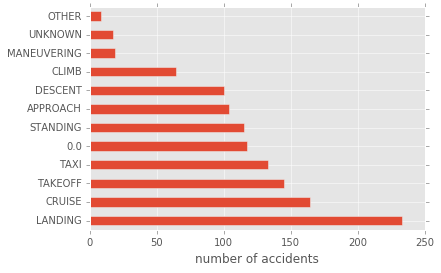

In [179]:
%matplotlib inline
occurrences_series.plot.barh(stacked=True)
plt.xlabel('number of accidents')

In [180]:
group = aircraft.groupby(['phase_gen', 'damage'])

In [181]:
phases_list = phases_dict.keys()
damage_list = ['NONE', 'SUBS', 'DEST', 'MINR', 'UNK']
injured = ['injured', 'fatalities']
phases = pd.DataFrame(columns=damage_list+injured)

In [182]:
phases

,NONE,SUBS,DEST,MINR,UNK,injured,fatalities


In [183]:
for phase in phases_list:
    sum_inj = 0
    sum_fat = 0
    for dam in damage_list:
        try:
            gg = group.get_group((phase, dam))
            phases.loc[phase, [dam]] = gg['ev_id'].count()
            mask = events['ev_id'].isin(gg['ev_id'])
            #print(mask.sum())
            inj_m = events[mask]['inj_tot_m'].sum()
            inj_s = events[mask]['inj_tot_s'].sum()
            fat = events[mask]['inj_tot_f'].sum()
            if not np.isnan(inj_m):
                sum_inj += inj_m
            if not np.isnan(inj_s):
                sum_inj += inj_s
            if not np.isnan(fat):
                sum_fat += fat
        except KeyError:
            pass
    
    phases.loc[phase, ['injured']] = sum_inj
    phases.loc[phase, ['fatalities']] = sum_fat
        #print(gg)
        #print(gg['ev_id'].count())
        

In [184]:
phases.rename_axis(phases_dict, inplace=True)
phases

,NONE,SUBS,DEST,MINR,UNK,injured,fatalities
APPROACH,15,31,50,6,2,363,1631
OTHER,2,5,1,NaN,NaN,4,10
CLIMB,29,22,10,3,NaN,162,601
STANDING,41,48,3,23,NaN,261,12
DESCENT,79,2,13,6,NaN,330,145
TAKEOFF,4,76,60,4,1,878,2056
MANEUVERING,1,4,14,NaN,NaN,19,134
LANDING,5,180,35,11,2,1205,739
CRUISE,98,19,34,13,NaN,892,1217
UNKNOWN,NaN,4,13,NaN,NaN,12,38


In [185]:
phases['TOTAL'] = phases[['NONE', 'MINR', 'SUBS', 'DEST']].sum(axis=1)
phases = phases.sort_values(by='TOTAL', ascending=False)

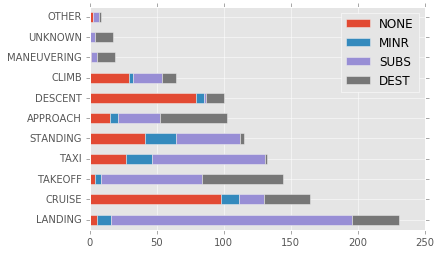

In [186]:
phases[['NONE', 'MINR', 'SUBS', 'DEST']].plot.barh(stacked=True)

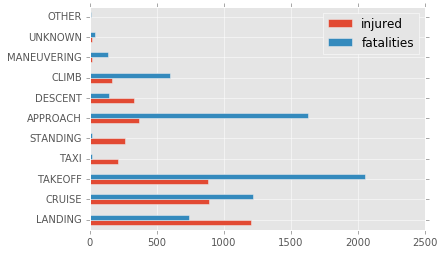

In [187]:
phases[['injured', 'fatalities']].plot.barh()

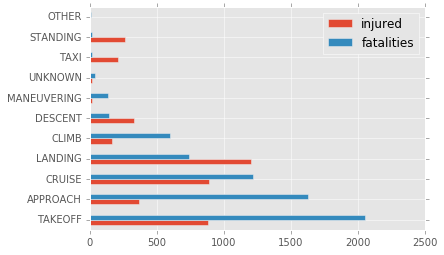

In [188]:
phases = phases.sort_values(by='fatalities', ascending=False)
phases[['injured', 'fatalities']].plot.barh()

#### Which are the main accident causes?

In [189]:
occurrences = pd.read_csv("./data/Occurrences1.csv",sep=';')

In [190]:
occurrences = occurrences[occurrences['ev_id'].isin(events['ev_id'])]

In [191]:
# ocurrences_filtered['ev_id'].value_counts()
occurrences[occurrences['ev_id']=='20001214X36685']

,ev_id,Aircraft_Key,Occurrence_No,Occurrence_Code,Phase_of_Flight,Altitude,lchg_date,lchg_userid
80803,20001214X36685,1,1,280,551,0,14/12/2000,dbo
80804,20001214X36685,1,2,100,551,0,14/12/2000,dbo
80805,20001214X36685,1,3,430,550,0,14/12/2000,dbo
80806,20001214X36685,2,1,280,541,0,14/12/2000,dbo
80807,20001214X36685,2,2,100,541,0,14/12/2000,dbo
80808,20001214X36685,2,3,130,540,0,14/12/2000,dbo


In [192]:
events[events['ev_id']=='20001214X36685']

,ev_id,ntsb_no,ev_type,ev_date,ev_city,ev_state,ev_country,ev_site_zipcode,mid_air,on_ground_collision,latitude,longitude,latlong_acq,apt_name,ev_nr_apt_id,ev_nr_apt_loc,apt_dist,apt_dir,apt_elev,wx_brief_comp,wx_src_iic,wx_obs_time,wx_obs_dir,wx_obs_fac_id,wx_obs_elev,wx_obs_dist,wx_obs_tmzn,light_cond,sky_cond_nonceil,sky_nonceil_ht,sky_ceil_ht,sky_cond_ceil,vis_rvr,vis_rvv,vis_sm,wx_temp,wx_dew_pt,wind_dir_deg,wind_dir_ind,wind_vel_kts,wind_vel_ind,gust_ind,gust_kts,altimeter,wx_dens_alt,wx_int_precip,metar,ev_highest_injury,inj_f_grnd,inj_m_grnd,inj_s_grnd,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,inj_tot_t,invest_agy,ntsb_docket,ntsb_notf_from,ntsb_notf_date,ntsb_notf_tm,fiche_number,lchg_date,lchg_userid,wx_cond_basic,faa_dist_office,latitude_num,longitude_num
66474,20001214X36685,CHI85FA249,ACC,1985-06-23 17:08:00,SOUTH HAVEN,MI,USA,49090,NaN,NaN,NaN,NaN,NaN,,,OFAP,"0,00000000e+00",0.0,NaN,UNK,PILO,0.0,0.0,,0.0,0.0,,DAYL,UNK,0.0,0.0,UNK,"0,00000000e+00",0.0,"0,00000000e+00",NaN,NaN,0.0,U,0.0,UNK,U,0.0,NaN,NaN,UNK,NaN,SERS,0.0,0.0,0.0,NaN,2.0,71.0,2.0,4.0,N,2474.0,NaN,06/23/1985 12:00:00 AM,0.0,30332,04/09/2001 10:27:21 AM,dbo,VMC,NaN,42.403087,-86.273641


In [193]:
from IPython.display import HTML
HTML('<iframe src="http://www.ntsb.gov/_layouts/ntsb.aviation/brief.aspx?ev_id=20001214X36685&key=2&queryId=9811677a-e5d5-43d4-8d8e-89599d9d47a4&pgno=3&pgsize=50" width="700" height="400"></iframe>')

In [194]:
occurrences['Occurrence_Code'] = occurrences['Occurrence_Code'].replace(
    to_replace=[131,171,172,191,192,193,195,232,271,351,352, 353,351,354],
    value=[130,170,170,190,190,190,190,230,270,520,520,350,350,350])

In [195]:
occurrences_series_2 = occurrences['Occurrence_Code'].value_counts()
occurrences_series_2 = occurrences_series_2[0:13]

In [196]:
occurrences_dict = {130:'AIRFRAME/COMPONENT/SYSTEM FAILURE/MALFUNCTION',
                    170:'FIRE/EXPLOSION',
                    180:'FORCED LANDING',
                    190:'GEAR COLLAPSED',
                    200:'HARD LANDING',
                    220:'IN FLIGHT COLLISION WITH OBJECT',
                    230:'IN FLIGHT COLLISION WITH TERRAIN/WATER',
                    240:'IN FLIGHT ENCOUNTER WITH WEATHER',
                    250:'LOSS OF CONTROL - IN FLIGHT',
                    260:'LOSS OF CONTROL - ON GROUND/WATER',
                    270:'MIDAIR COLLISION',
                    280:'NEAR COLLISION BETWEEN AIRCRAFT',
                    300:'NOSE OVER',
                    310:'ON GROUND/WATER COLLISION WITH OBJECT',
                    320:'ON GROUND/WATER ENCOUNTER WITH TERRAIN/WATER',
                    340:'OVERRUN',
                    350:'LOSS OF ENGINE POWER',
                    430:'MISCELLANEOUS/OTHER',
                    520:'DESCENT'}
            
occurrences_series_2 = occurrences_series_2.rename_axis(occurrences_dict)

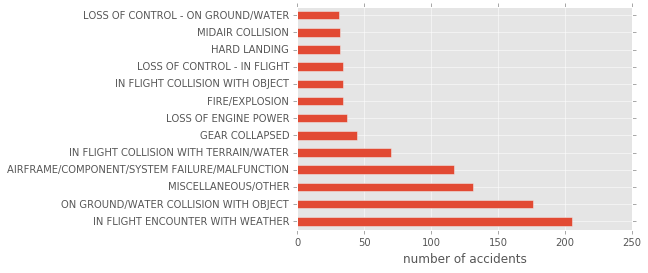

In [197]:
occurrences_series_2.plot.barh(stacked=True)
plt.xlabel('number of accidents')

#### What impact does experience have?

In [198]:
flight_crew = pd.read_csv('./data/flight_crew.csv')

# Only crew for the selected events:
flight_crew = flight_crew[flight_crew['ev_id'].isin(events['ev_id'])]
flight_crew.head(5)

,ev_id,Aircraft_Key,crew_no,crew_category,crew_age,crew_sex,crew_city,crew_res_state,crew_res_country,med_certf,med_crtf_vldty,date_lst_med,crew_rat_endorse,crew_inj_level,seatbelts_used,shldr_harn_used,crew_tox_perf,seat_occ_pic,pc_profession,bfr,bfr_date,ft_as_of,lchg_date,lchg_userid,seat_occ_row,infl_rest_inst,infl_rest_depl,child_restraint,med_crtf_limit,mr_faa_med_certf,pilot_flying,available_restraint,restraint_used
41,20140507X51410,1,1,PLT,53.0,NaN,Lexington,SC,USA,CL1,NaN,01/21/2014 12:00:00 AM,NaN,NONE,NaN,NaN,N,LEFT,Y,NaN,02/20/2014 12:00:00 AM,NaN,09/10/2015 05:10:53 PM,lovj,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
42,20140507X51410,1,2,CPLT,43.0,NaN,Sandy,UT,USA,CL1,NaN,03/06/2013 12:00:00 AM,NaN,NONE,NaN,NaN,N,RGT,Y,NaN,NaN,NaN,09/10/2015 04:14:54 PM,lovj,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
144,20030314X00332,1,1,PLT,34.0,M,Raleigh,NC,USA,CL1,VNOW,10/15/2002 12:00:00 AM,Y,NONE,Y,Y,N,LEFT,PCIV,NaN,NaN,NaN,06/02/2004 01:09:06 PM,POWP,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
145,20030314X00332,1,3,CPLT,38.0,M,New Bern,NC,USA,CL2,VWW,09/04/2002 12:00:00 AM,N,NONE,Y,Y,N,RGT,PCIV,NaN,NaN,NaN,06/02/2004 01:09:06 PM,POWP,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
294,20141227X82857,1,1,PLT,NaN,NaN,NaN,NaN,CO,NaN,NaN,NaN,NaN,FATL,NaN,NaN,NaN,LEFT,Y,NaN,NaN,NaN,03/30/2015 10:20:24 AM,kenj,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [199]:
flight_crew['crew_category'].value_counts()

PLT      1302
CPLT      491
FENG       32
OTHR       23
KPLT        6
PASS        2
Name: crew_category, dtype: int64

In [212]:
%matplotlib inline
# Remove spaces
flight_crew['crew_category'] = flight_crew['crew_category'].str.strip()

# Pilots and copilots
crew_cat = ['PLT', 'CPLT']
# crew_cat = ['CPLT']
is_plt_cplt = flight_crew['crew_category'].isin(crew_cat)

In [213]:
flight_crew_pc = flight_crew[is_plt_cplt]

flight_crew_pc['crew_age'].describe()

count    1382.000000
mean       44.403039
std         9.583374
min        20.000000
25%        37.000000
50%        45.000000
75%        52.000000
max        68.000000
Name: crew_age, dtype: float64

([<matplotlib.axis.XTick at 0x7f0c76f0dac8>],
 <a list of 1 Text xticklabel objects>)

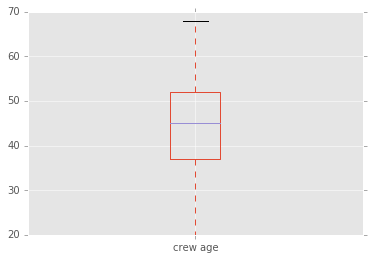

In [214]:
flight_crew_pc['crew_age'].plot.box()
plt.xticks([1],['crew age'])

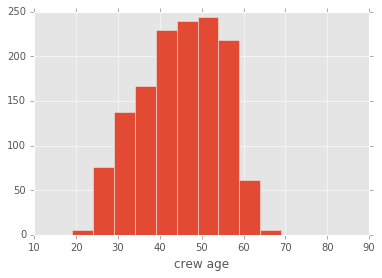

In [215]:
bins = np.arange(14, 85, 5)
flight_crew_pc['crew_age'].hist(bins=bins)
plt.xlabel('crew age')

According to GAMMA databook:
    http://www.gama.aero/files/GAMA_2015_Databook_LoRes%20updated%203-29-2016.pdf
    http://www.gama.aero/media-center/industry-facts-and-statistics/statistical-databook-and-industry-outlook#year2015

In [216]:
licenses_by_age_airline = np.array([0, 572, 5199, 12003, 15507,
                                                          18337, 23058, 25882, 24220, 16824,
                                                          10184, 4284, 1766, 787])

In [218]:
age_group = pd.cut(flight_crew_pc['crew_age'], bins)
gby_age = flight_crew_pc['ev_id'].groupby(age_group).count()
gby_age

crew_age
(14, 19]      0
(19, 24]     12
(24, 29]     94
(29, 34]    152
(34, 39]    175
(39, 44]    222
(44, 49]    252
(49, 54]    247
(54, 59]    200
(59, 64]     26
(64, 69]      2
(69, 74]      0
(74, 79]      0
(79, 84]      0
dtype: int64

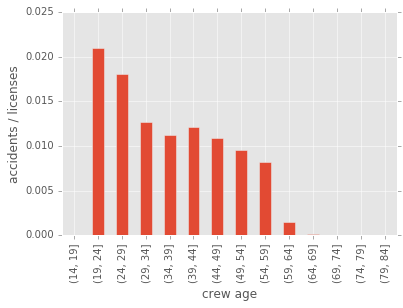

In [219]:
accident_rate_age_1 = gby_age / licenses_by_age_airline
accident_rate_age_1.plot.bar()
plt.ylabel('accidents / licenses')
plt.xlabel('crew age')

It seems that some people have investigated this issue before:
>  the accident rate of airline transport
rated (ATR) pilots aged 55–59 (3.78/1,000) is approximately one-third of that of pilots with the
same rating who are aged 20–24 (11.71/10,000). <cite>John A. Wise, V. David Hopkin, Daniel J. Garland, Handbook of Aviation Human Factors, Second Edition</cite>

0 PLT
1 CPLT


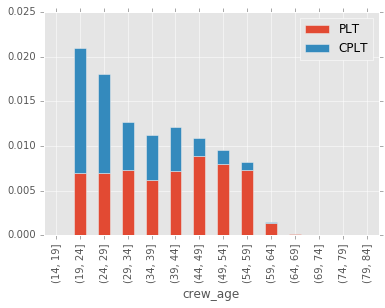

In [220]:
df = pd.DataFrame({})
for ii, role in enumerate(['PLT', 'CPLT']):
    print(ii, role)
    is_role = flight_crew['crew_category'] == role
    flight_crew_role = flight_crew[is_role]
    
    age_group = pd.cut(flight_crew_role['crew_age'], bins)
    df[role] = flight_crew_role['ev_id'].groupby(age_group).count() / licenses_by_age_airline

df.plot.bar(stacked=True)

In [227]:
flight_time = pd.read_csv('./data/flight_time.csv', sep=';', usecols=(0,1,2,3,4,5))
cond = flight_time['ev_id'].isin(events['ev_id'])
flight_crew = flight_crew[cond]

/miniconda/envs/pydata-safety/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [228]:
flight_time.head()

,ev_id,Aircraft_Key,crew_no,flight_type,flight_craft,flight_hours
0,20001204X00000,1,1,L24H,ALL,6.0
1,20001204X00000,1,1,L30D,ALL,100.0
2,20001204X00000,1,1,L90D,ALL,238.0
3,20001204X00000,1,1,PIC,ALL,5230.0
4,20001204X00000,1,1,TOTL,ALL,5350.0


In [229]:
flight_time['flight_type'] = flight_time['flight_type'].str.split().str[0]
flight_time['flight_craft'] = flight_time['flight_craft'].str.split().str[0]

In [260]:
cond1 = flight_time['flight_type'] == 'TOTL'
flight_time = flight_time[cond1]
flight_time.head()

,ev_id,Aircraft_Key,crew_no,flight_type,flight_craft,flight_hours
4,20001204X00000,1,1,TOTL,ALL,5350.0
5,20001204X00000,1,1,TOTL,MAKE,1100.0
21,20001204X00001,1,1,TOTL,ALL,23000.0
22,20001204X00001,1,1,TOTL,MAKE,3000.0
47,20001204X00002,1,1,TOTL,ALL,10000.0


In [261]:
cond2 = flight_time['flight_craft'].isin(['ALL', 'MAKE'])
flight_time = flight_time[cond2]
flight_time.head()

,ev_id,Aircraft_Key,crew_no,flight_type,flight_craft,flight_hours
4,20001204X00000,1,1,TOTL,ALL,5350.0
5,20001204X00000,1,1,TOTL,MAKE,1100.0
21,20001204X00001,1,1,TOTL,ALL,23000.0
22,20001204X00001,1,1,TOTL,MAKE,3000.0
47,20001204X00002,1,1,TOTL,ALL,10000.0


In [262]:
exp_in_acc_ac = flight_time.groupby('flight_craft').get_group('MAKE')
exp_in_acc_ac['flight_hours'].describe()

count     65459.000000
mean        945.199840
std       15236.880096
min           0.000000
25%          40.000000
50%         150.000000
75%         592.000000
max      999999.000000
Name: flight_hours, dtype: float64

In [263]:
a = exp_in_acc_ac['flight_hours'].value_counts()
a = a.sort_index(ascending=False)
a.iloc[:10]

999999.0    15
119612.0     1
99999.0      3
38200.0      1
33000.0      1
31603.0      1
30000.0      4
27075.0      1
27000.0      1
26000.0      1
Name: flight_hours, dtype: int64

In [268]:
cond = exp_in_acc_ac['flight_hours'] < 1000
exp_in_acc_ac = exp_in_acc_ac[cond]
exp_in_acc_ac.describe()

,Aircraft_Key,crew_no,flight_hours
count,53897.000000,53897.000000,53897.000000
mean,1.011763,1.043657,193.957528
std,0.109696,0.211122,227.122149
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,30.000000
50%,1.000000,1.000000,98.000000
75%,1.000000,1.000000,283.000000
max,4.000000,5.000000,999.000000


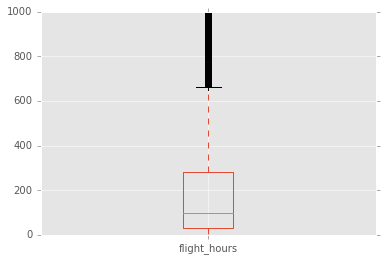

In [269]:
%matplotlib inline
exp_in_acc_ac['flight_hours'].plot.box()

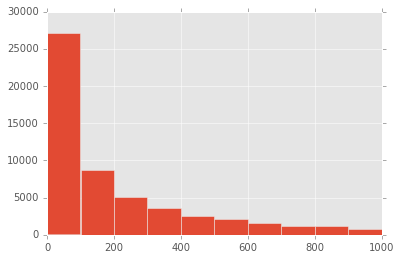

In [270]:
exp_in_acc_ac['flight_hours'].hist()

In [271]:
exp_total = flight_time.groupby('flight_craft').get_group('ALL')

In [272]:
cond = exp_total['flight_hours']<99998
exp_total = exp_total[cond]

In [273]:
exp_total['flight_hours'].describe()

count    74093.000000
mean      3524.429492
std       5527.320693
min          0.000000
25%        305.000000
50%       1187.000000
75%       4198.000000
max      96845.000000
Name: flight_hours, dtype: float64

In [274]:
a = exp_total['flight_hours'].value_counts()
a = a.sort_index(ascending=False)
a.iloc[:10]

96845.0    1
94004.0    1
90000.0    1
82818.0    1
72906.0    1
65000.0    1
60000.0    1
59000.0    1
55563.0    1
55000.0    1
Name: flight_hours, dtype: int64

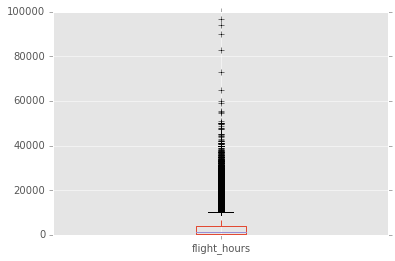

In [276]:
exp_total['flight_hours'].plot.box()

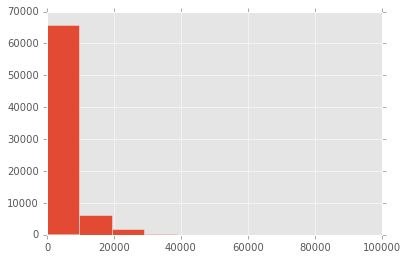

In [277]:
exp_total['flight_hours'].hist()

#### And finally... is commercial air transport safer now than 30 years ago?

In [278]:
ev_before_2016 = events[events['ev_date'].dt.year < 2016]
gby_year = events.groupby(ev_before_2016.ev_date.dt.year)

injured_per_year = gby_year[['inj_tot_f', 'inj_tot_s', 'inj_tot_m']].count()

#injured_per_year.index = np.arange(1982, 2016)
injured_per_year.head()

,inj_tot_f,inj_tot_s,inj_tot_m
ev_date,,,
1982.0,4,10,7
1983.0,4,12,5
1984.0,1,9,8
1985.0,7,10,9
1986.0,3,16,14


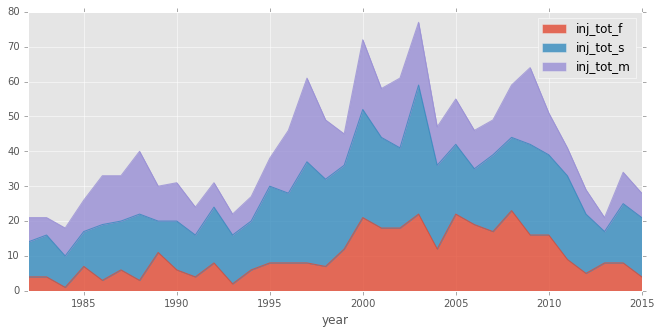

In [279]:
injured_per_year.plot.area(alpha=0.8, figsize=(11,5))
plt.xlabel('year')

In [280]:
passengers = pd.read_csv('./data/annual_passengers_carried/data.csv', nrows=1, usecols=range(4,60))
passengers = passengers.transpose()
# renaming column
passengers.columns = ['passengers']
passengers
# parsing date in index 
passengers.index = pd.to_datetime(passengers.index.str[:4])
# converting flight number to number
passengers['passengers'] = pd.to_numeric(passengers['passengers'], errors='coerce') / 1e6
passengers.index = passengers.index.year

In [281]:
flights = pd.read_csv('./data/annual_worldwide_departures/data.csv', nrows=1, usecols=range(4,59))
flights = flights.transpose()
# renaming column
flights.columns = ['flights']
flights
# parsing date in index 
flights.index = pd.to_datetime(flights.index.str[:4])
# converting flight number to number
flights['flights'] = pd.to_numeric(flights['flights'], errors='coerce') / 1e6

flights.index = np.arange(1960,2015)

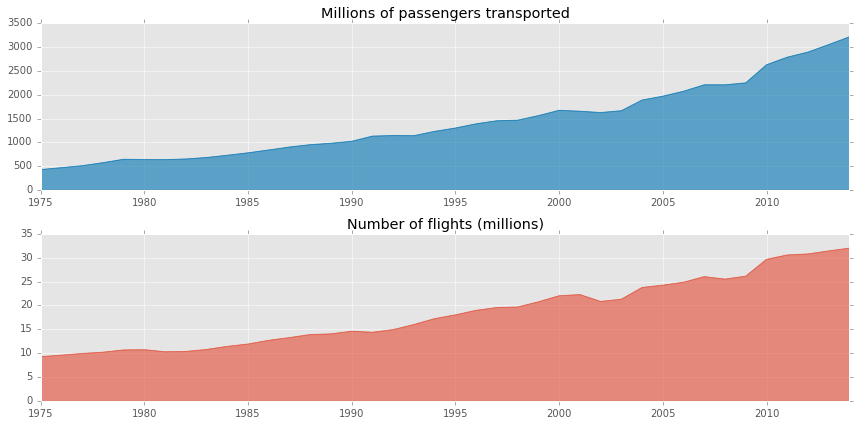

In [282]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].set_title('Millions of passengers transported')
passengers['passengers'].plot.area(ax=ax[0], alpha=0.6, color="#0072B2")
ax[0].set_xlim(1975, 2014)

ax[1].set_title('Number of flights (millions)')
flights['flights'].plot.area(ax=ax[1], alpha=0.6)
ax[1].set_xlim(1975, 2014)

plt.tight_layout()

(1982, 2015)

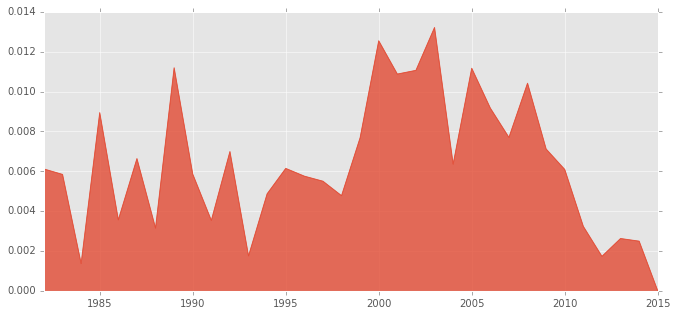

In [283]:
letality_rate = injured_per_year['inj_tot_f'] / passengers['passengers']
ax = letality_rate.plot.area(alpha=0.8, figsize=(11,5))
ax.set_xlim(1982, 2015)

(1982, 2015)

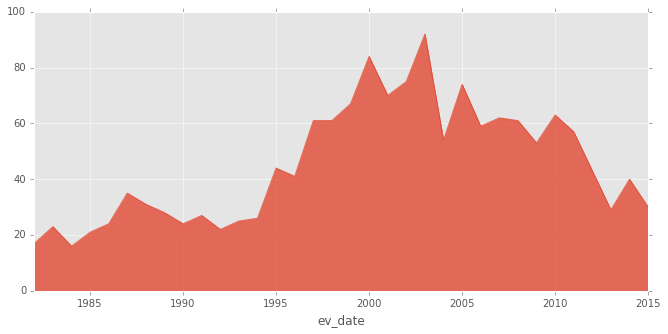

In [284]:
accidents_gby_year = events['ev_id'].groupby(events.ev_date.dt.year).count()
ax = accidents_gby_year.plot.area(alpha=0.8, figsize=(11,5))
ax.set_xlim(1982, 2015)

In [285]:
accident_rate = accidents_gby_year / flights.flights
accident_rate.tail()

2012    1.397407
2013    0.923342
2014    1.250260
2015         NaN
2016         NaN
dtype: float64

(2000, 2009)

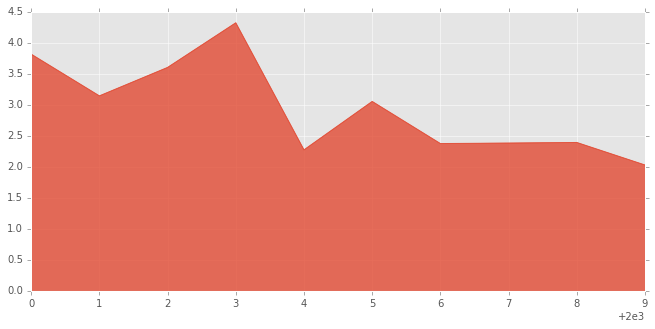

In [288]:
ax = accident_rate.plot.area(alpha=0.8, figsize=(11,5))
ax.set_xlim(2000, 2009)

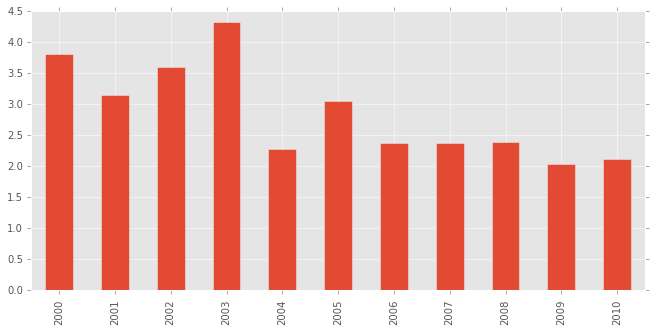

In [299]:
ax = accident_rate.loc[2000:2010].plot.bar(figsize=(11,5))

#### Other Questions... 

### Conclusions 

# Thanks for yor attention! 

![PyData_logo](./static/pydata-logo-madrid-2016.png)

## Any Questions?


---


In [1]:
# Notebook style
from IPython.core.display import HTML
css_file = './static/style.css'
HTML(open(css_file, "r").read())